In the following, we perform a text analysis of Nietzsche's *The Antichrist*. We also create a network representation of the text to extend our analysis.

In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

In [2]:
require(xtable)

require(wordcloud)

require(tidyverse)

require(gutenbergr)

require(tidytext)

require(dplyr)

require(curl)

require(igraph)

Loading required package: xtable

Warning message:
“package ‘xtable’ was built under R version 4.0.2”
Loading required package: wordcloud

Warning message:
“package ‘wordcloud’ was built under R version 4.0.2”
Loading required package: RColorBrewer

Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.2”
Loading required package: tidyverse

Warning message:
“package ‘tidyverse’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘readr’ was built under R version 4.0.2”
Warning message:
“package ‘purrr’ was built under R version 4.0.2”
War

We use ```gutenbergr``` to download the text file directly from Project Gutenberg's site

In [3]:
book <- gutenberg_download(c(19322))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



The text has an introduction by the translator, H. L. Menken, so we must find where his words end and Nietzsche's begin.

In [4]:
which(grepl("MENCKEN", book$text))

[1]  24  54 603

In [5]:
book[600:610, 2]

text
<chr>
"for criticism, and to Messrs. Common and Ludovici for showing me the way"
around many a difficulty.
""
H. L. MENCKEN.
""
""
""
""
PREFACE


In [6]:
which(grepl("PREFACE", book$text))

[1]  55 608

In [7]:
book[608:650,2]

text
<chr>
PREFACE
""
""
This book belongs to the most rare of men. Perhaps not one of them is
yet alive. It is possible that they may be among those who understand my
"""Zarathustra"": how _could_ I confound myself with those who are now"
sprouting ears?--First the day after tomorrow must come for me. Some men
are born posthumously.
""


We see the *The Antichrist* begins at line 608, so we delete our first 607 lines from the book

In [8]:
book <- book[-seq(from=1, to=607, by=1), ]

Next, we get rid of numbers and punctuation in the text. We then extract the characters and words occuring in the text, and get rid of so-called 'stop words'

In [9]:
book$text <- gsub(x = book$text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = " ")

In [10]:
chars <- book %>% unnest_tokens(chars, text, "characters")

In [11]:
words <- book %>% unnest_tokens(words, text, "words")

In [12]:
words <- words %>% filter(!words %in% stop_words$word)

Here is a barplot of the characters in the text

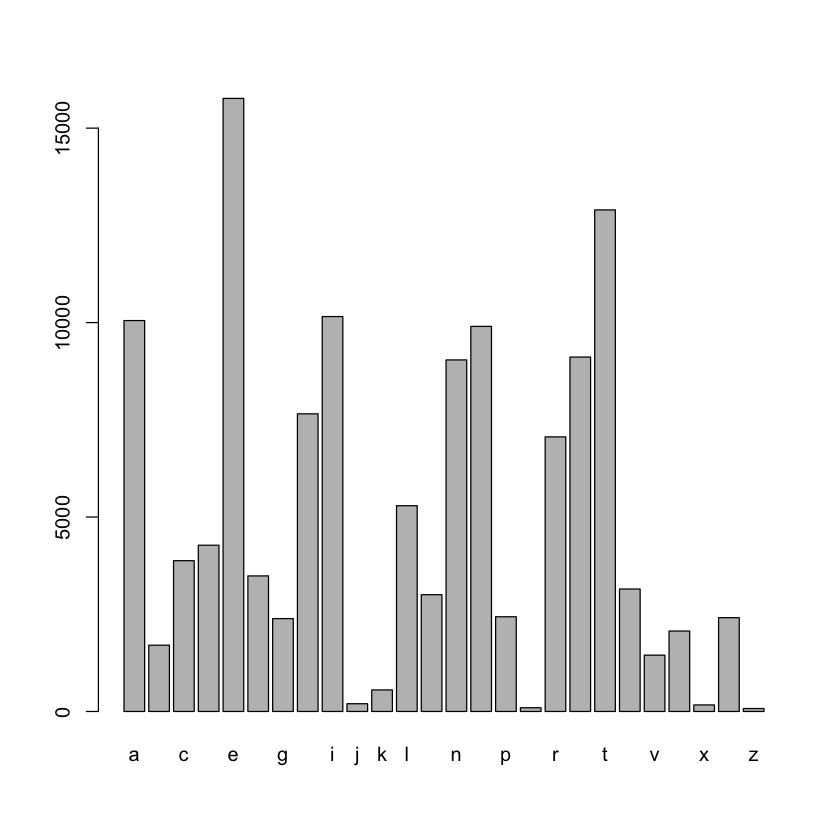

In [13]:
barplot(table(chars$chars))

Here is a better one:

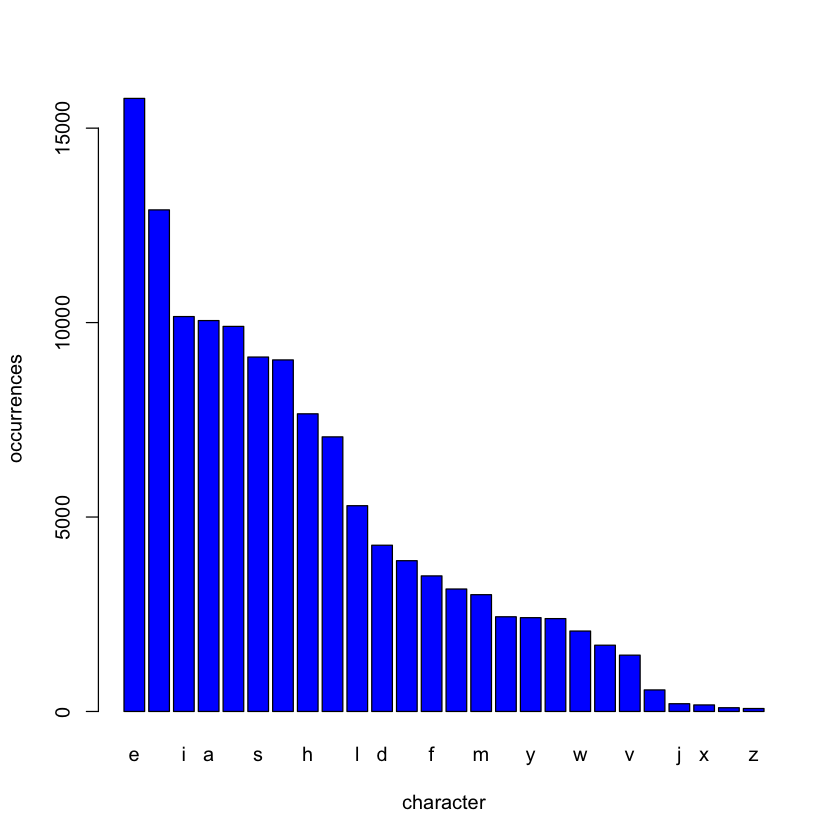

In [14]:
barplot(sort(table(chars$chars), decreasing=TRUE), 
        xlab='character',
        ylab='occurrences', 
        col='blue')

In [15]:
#Generate png file of plot above
png(filename = "barplot_characters.png", height=2000, width=2000, res=400)
barplot(sort(table(chars$chars), decreasing=TRUE), xlab='character', ylab='occurrences', col='blue')
dev.off()

pdf 
  2

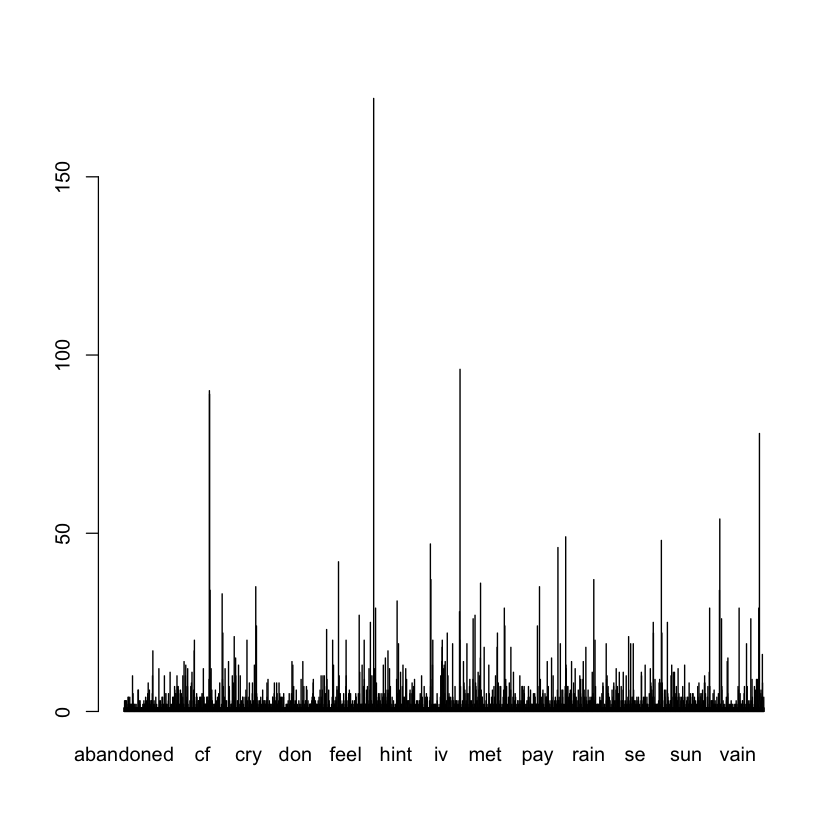

In [16]:
barplot(table(words$words))

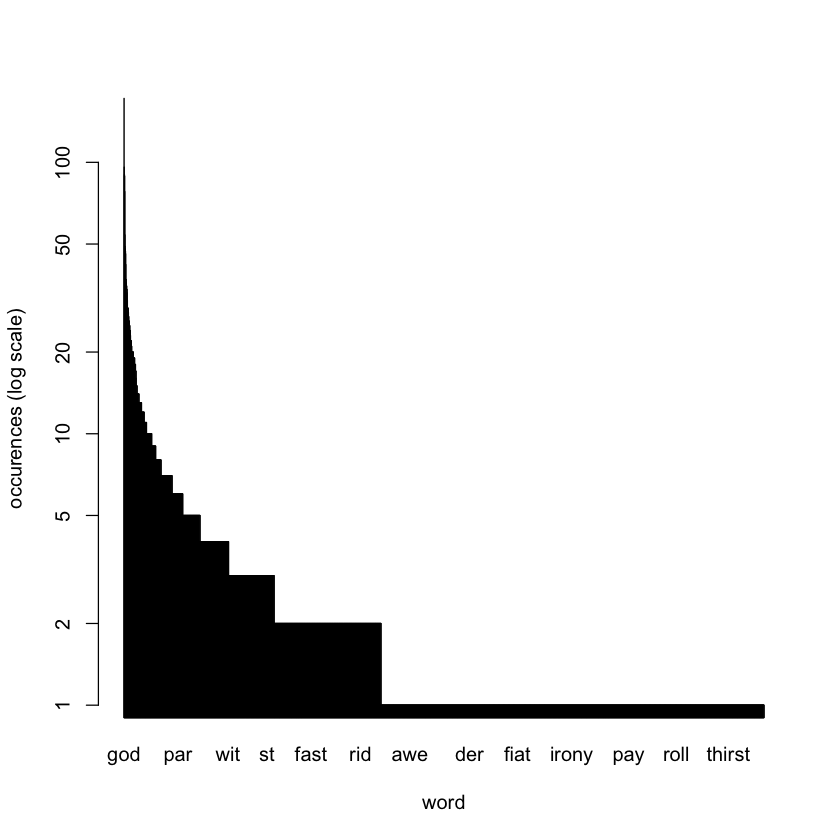

In [17]:
barplot(sort(table(words$words), decreasing=TRUE),
        xlab = 'word', 
        ylab = 'occurences (log scale)', 
        log="y")

In [18]:
#Generate png file of plot above
png(filename = "barplot_words.png", height=2000, width=2000, res=400)
barplot(sort(table(words$words), decreasing=TRUE),
        xlab = 'word', 
        ylab = 'occurences (log scale)', 
        log="y")
dev.off()

pdf 
  2

We save our table as a data frame ```df_chars``` and get a summary of the character's occurrences. We also get a second data frame, ```freq_chars``` with the most used characters (those which appear more than the median of occurrences).

In [19]:
df_chars <- as.data.frame(table(chars$chars))

In [20]:
summary(df_chars$Freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     76    1795    3318    4933    8694   15765 

In [21]:
freq_chars <- df_chars[df_chars$Freq > 3318,]

In [22]:
freq_chars <- freq_chars[order(freq_chars$Freq, decreasing=TRUE),]

In [23]:
names(freq_chars) = c('letter', 'freq')

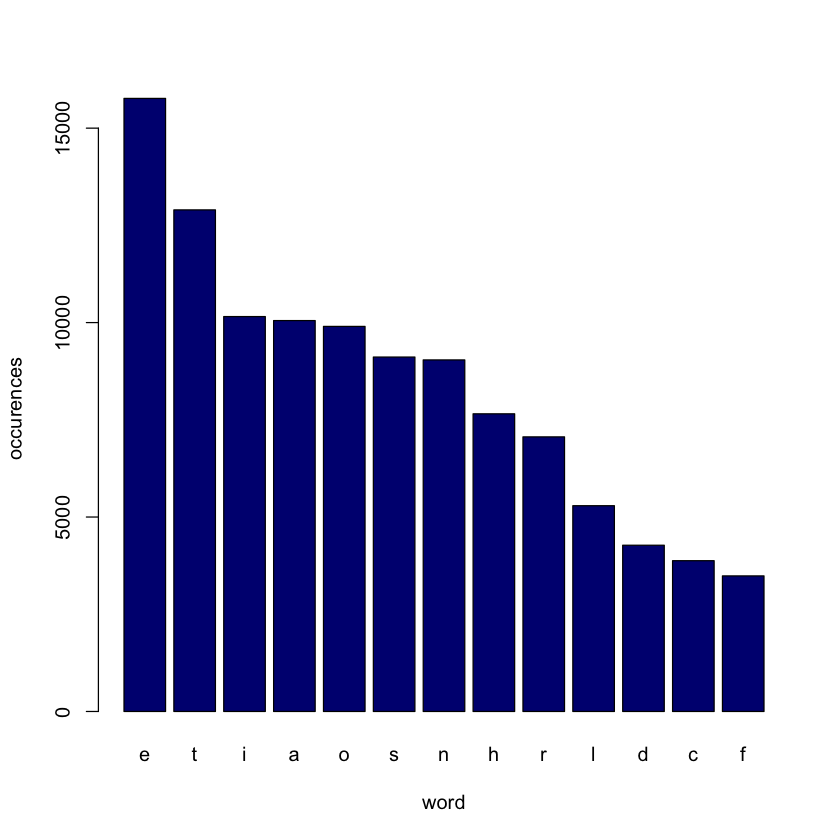

In [24]:
barplot(freq_chars$freq, 
        names.arg=freq_chars$letter, 
        col='navy',
       xlab='word',
       ylab='occurences')

In [25]:
#Generate png file of plot above
png(filename = "barplot_freq_chars.png", height=2000, width=2000, res=400)
barplot(freq_chars$freq, 
        names.arg=freq_chars$letter, 
        col='navy',
       xlab='word',
       ylab='occurences')
dev.off()

pdf 
  2

We do the same for words, except our frequent words are those over the .95 quantile.

In [26]:
df_words <- as.data.frame(table(words$words))

In [27]:
names(df_words) <- c("words", "freq")

In [28]:
df_words <- df_words[order(df_words$freq, decreasing=TRUE),]

In [29]:
summary(df_words$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.691   2.000 172.000 

In [30]:
quantile(df_words$freq, .95)

95% 
  8

In [31]:
freq_words <- df_words[df_words$freq > 8, ]

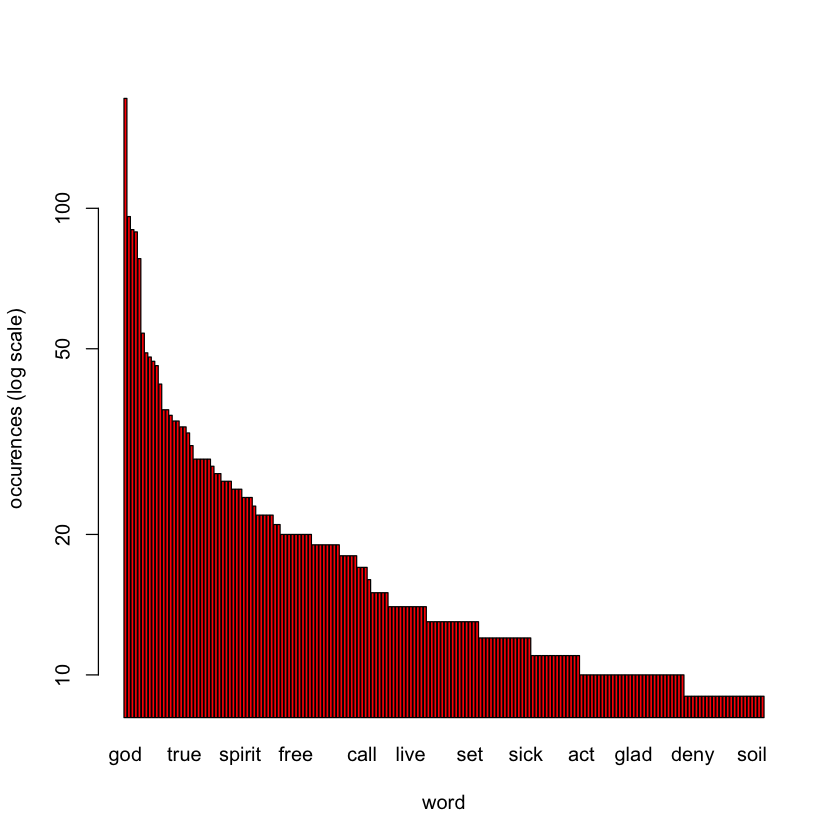

In [32]:
barplot(freq_words$freq, names.arg = freq_words$words, 
        col='red', 
        xlab = 'word', 
        ylab = 'occurences (log scale)', 
        log="y")

In [33]:
#Generate png file of plot above
png(filename = "barplot_freq_words.png", height=2000, width=2000, res=400)
barplot(freq_words$freq, names.arg = freq_words$words, 
        col='red', 
        xlab = 'word', 
        ylab = 'occurences (log scale)', 
        log="y")
dev.off()


pdf 
  2

We get tables for the 10 most frequent characters and words in the text

In [34]:
top10_chars <- head(freq_chars, 10)

In [35]:
row.names(top10_chars) <- seq(1, 10, by=1)

In [37]:
top10_chars

,letter,freq
,<fct>,<int>
1,e,15765
2,t,12898
3,i,10155
4,a,10052
5,o,9902
6,s,9114
7,n,9040
8,h,7654
9,r,7061


In [36]:
#This will be used in a LaTeX report
print(xtable(top10_chars))

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 14 19:34:42 2020
\begin{table}[ht]
\centering
\begin{tabular}{rlr}
  \hline
 & letter & freq \\ 
  \hline
1 & e & 15765 \\ 
  2 & t & 12898 \\ 
  3 & i & 10155 \\ 
  4 & a & 10052 \\ 
  5 & o & 9902 \\ 
  6 & s & 9114 \\ 
  7 & n & 9040 \\ 
  8 & h & 7654 \\ 
  9 & r & 7061 \\ 
  10 & l & 5291 \\ 
   \hline
\end{tabular}
\end{table}


In [38]:
top10_words <- head(freq_words, 10)

In [39]:
row.names(top10_words) <- seq(1, 10, by=1)

In [40]:
top10_words

,words,freq
,<fct>,<int>
1,god,172
2,life,96
3,christian,90
4,christianity,89
5,world,78
6,truth,54
7,priest,49
8,sort,48
9,instinct,47


In [41]:
#This will be used in a LaTeX report
print(xtable(top10_words))

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 14 19:35:15 2020
\begin{table}[ht]
\centering
\begin{tabular}{rlr}
  \hline
 & words & freq \\ 
  \hline
1 & god & 172 \\ 
  2 & life &  96 \\ 
  3 & christian &  90 \\ 
  4 & christianity &  89 \\ 
  5 & world &  78 \\ 
  6 & truth &  54 \\ 
  7 & priest &  49 \\ 
  8 & sort &  48 \\ 
  9 & instinct &  47 \\ 
  10 & power &  46 \\ 
   \hline
\end{tabular}
\end{table}


We use the ```wordcloud```library to create a word cloud of the most occurring words

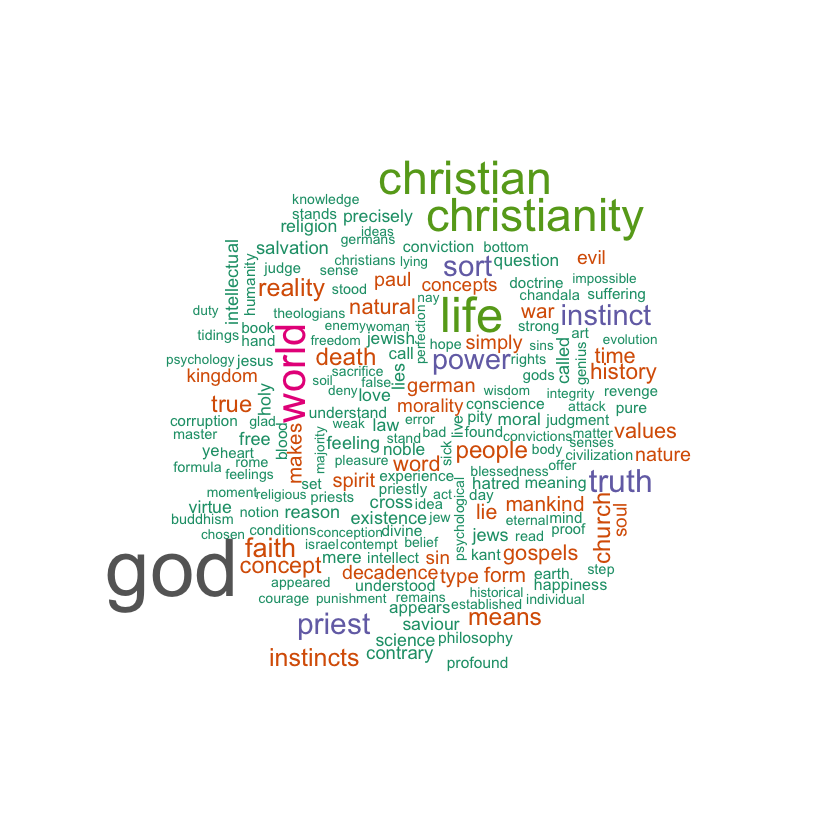

In [42]:
wordcloud(
  words = freq_words$words, 
  freq = freq_words$freq, 
  colors = brewer.pal(8, 'Dark2')
)

In [43]:
#Generate png file of plot above
png(filename = "wordcloud.png", height=2000, width=2000, res=400)
wordcloud(
  words = freq_words$words, 
  freq = freq_words$freq, 
  colors = brewer.pal(8, 'Dark2')
)
dev.off()

pdf 
  2

Now, we get pairs of words occurring together (bigrams)

In [44]:
word_pairs <- book %>% 
  unnest_tokens(
    input = text, 
    output = bigram, 
    token = 'ngrams', 
    n = 2
  ) %>% 
  filter(! is.na(bigram))

We separate the bigrams in two columns, and filter out stop words

In [45]:
word_pairs <- word_pairs %>% 
  separate(col = bigram, into = c('word1', 'word2'), sep = ' ')%>% 
  filter(! word1 %in% stop_words$word) %>% 
  filter(! word2 %in% stop_words$word) %>% 
  filter(! is.na(word1)) %>% 
  filter(! is.na(word2)) 

We count the time each bigram shows up, and named this column weight

In [46]:
word_pairs_count <- word_pairs %>% 
  count(word1, word2, sort = TRUE) %>% 
  rename(weight = n)

We extract the most occurring bigrams, in this case, those appearing two or more times.

In [47]:
summary(word_pairs_count$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.07    1.00   10.00 

In [48]:
word_pairs_count <- word_pairs_count[word_pairs_count$weight > 1, ]

With this data, and using ```igraph``` we create a network. Each of our words represents a node, joined by an edge if they appear together as a bigram. The edges are weighted, with their weight being equal to how many times the bigram appears.

In [49]:
network <- word_pairs_count %>% graph_from_data_frame(directed = FALSE)

In [50]:
is.weighted(network)

[1] TRUE

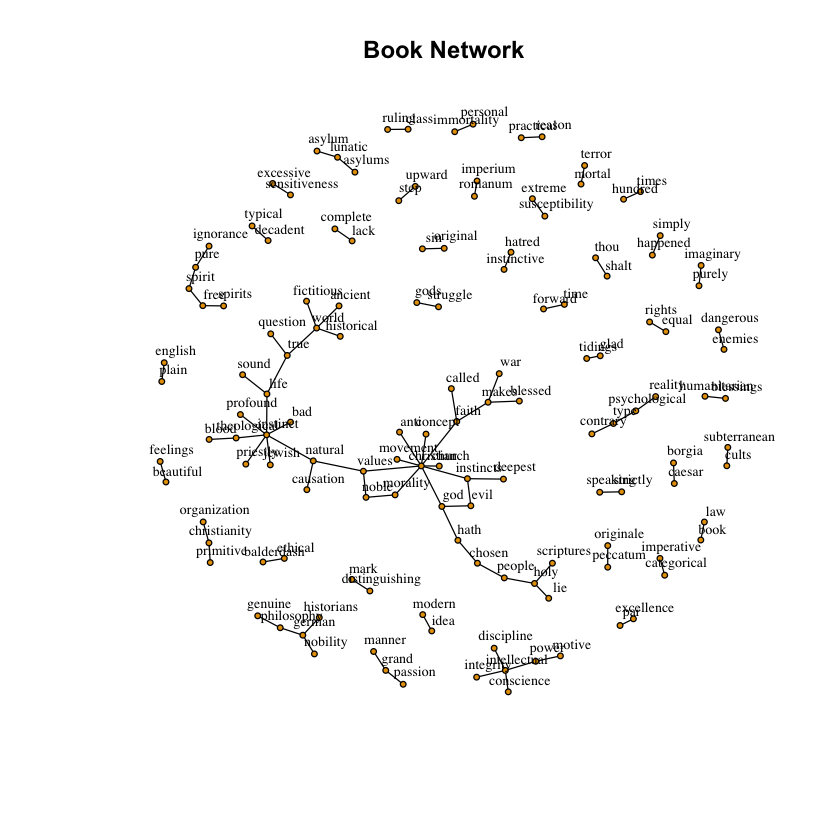

In [51]:
 plot(
  network, 
  vertex.size = 2,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.7, 
  vertex.label.dist = .8,
  edge.color = 'black', 
  edge.width = 1,
  main = 'Book Network', 
  alpha = 10
)

In [52]:
#This is the code for generating the network above in a png file
png(filename = "bigram_network.png", height=3500, width=3500, res=400)
 plot(
  network, 
  vertex.size = 2,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.7, 
  vertex.label.dist = .8,
  edge.color = 'black', 
  edge.width = 1,
  alpha = 10
)
dev.off()

pdf 
  2

We get the *strength* of each vertex, which is a weighted degree. That is, if a vertex $v$ has edges $e_1, e_2, \dots, e_k$ inciding on it, each having weights $w_1, w_2, \dots, w_k$ respectively, the strength of $v$ is $\sum_{i = 1}^{k} w_i$

We also calculate the weight of each edge in proportion to the weight of other edges

We use this information to make the size of vertices proportional to their strength, and the width of the edges proportional to their weight.

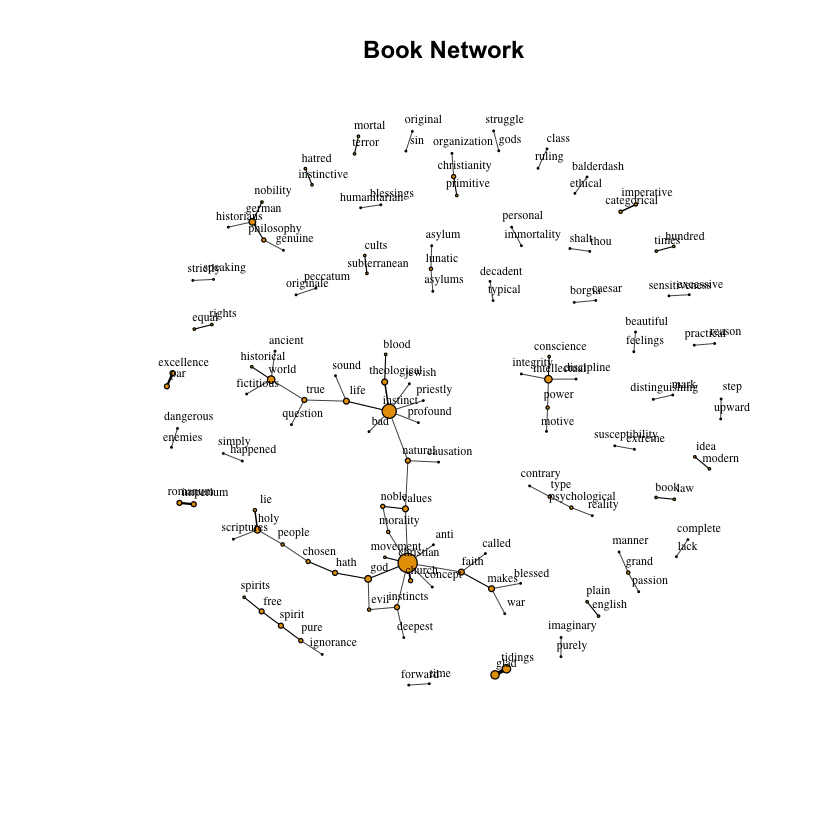

In [54]:
V(network)$degree <- strength(graph = network)

E(network)$width <- E(network)$weight/max(E(network)$weight)

plot(
  network, 
  vertex.size = .3*V(network)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = .8,
  edge.color = 'black', 
  edge.width = 3*E(network)$width ,
  main = 'Book Network', 
  alpha = 10
    )

In [55]:
#Generate a png file for the plot above
png(filename = "bigram_network_2.png", height=3500, width=3500, res=400)
V(network)$degree <- strength(graph = network)

E(network)$width <- E(network)$weight/max(E(network)$weight)

plot(
  network, 
  vertex.size = .3*V(network)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = .8,
  edge.color = 'black', 
  edge.width = 3*E(network)$width ,
  alpha = 10
    )
dev.off()

pdf 
  2

We get the largest component from the network

In [56]:
groups(components(network))

$`1`
[1] "glad"    "tidings"

$`2`
[1] "imperium" "romanum" 

$`3`
[1] "par"        "excellence"

$`4`
 [1] "christian"   "holy"        "theological" "faith"       "god"        
 [6] "hath"        "life"        "noble"       "world"       "ancient"    
[11] "anti"        "bad"         "called"      "chosen"      "deepest"    
[16] "evil"        "fictitious"  "jewish"      "makes"       "natural"    
[21] "priestly"    "profound"    "question"    "sound"       "true"       
[26] "church"      "lie"         "instinct"    "movement"    "values"     
[31] "blood"       "historical"  "people"      "concept"     "instincts"  
[36] "morality"    "scriptures"  "blessed"     "war"         "causation"  

$`5`
[1] "categorical" "imperative" 

$`6`
[1] "equal"  "rights"

$`7`
[1] "free"      "pure"      "spirit"    "spirits"   "ignorance"

$`8`
[1] "german"     "genuine"    "nobility"   "philosophy" "historians"

$`9`
[1] "hundred" "times"  

$`10`
[1] "instinctive" "hatred"     

$`11`
[1] "intellectual" "motive"       "conscience"   "discipline"   "integrity"   
[6] "power"       

$`12`
[1] "law"  "book"

$`13`
[1] "modern" "idea"  

$`14`
[1] "mortal" "terror"

$`15`
[1] "plain"   "english"

$`16`
[1] "primitive"    "organization" "christianity"

$`17`
[1] "subterranean" "cults"       

$`18`
[1] "beautiful" "feelings" 

$`19`
[1] "caesar" "borgia"

$`20`
[1] "complete" "lack"    

$`21`
[1] "contrary"      "psychological" "type"          "reality"      

$`22`
[1] "dangerous" "enemies"  

$`23`
[1] "distinguishing" "mark"          

$`24`
[1] "ethical"    "balderdash"

$`25`
[1] "excessive"     "sensitiveness"

$`26`
[1] "extreme"        "susceptibility"

$`27`
[1] "gods"     "struggle"

$`28`
[1] "grand"   "manner"  "passion"

$`29`
[1] "happened" "simply"  

$`30`
[1] "humanitarian" "blessings"   

$`31`
[1] "lunatic" "asylum"  "asylums"

$`32`
[1] "original" "sin"     

$`33`
[1] "peccatum"  "originale"

$`34`
[1] "personal"    "immortality"

$`35`
[1] "practical" "reason"   

$`36`
[1] "purely"    "imaginary"

$`37`
[1] "ruling" "class" 

$`38`
[1] "step"   "upward"

$`39`
[1] "strictly" "speaking"

$`40`
[1] "thou"  "shalt"

$`41`
[1] "time"    "forward"

$`42`
[1] "typical"  "decadent"

In [57]:
vertices_large_component <- groups(components(network))$'4'

In [58]:
large_component <- induced_subgraph(network, vids=vertices_large_component)

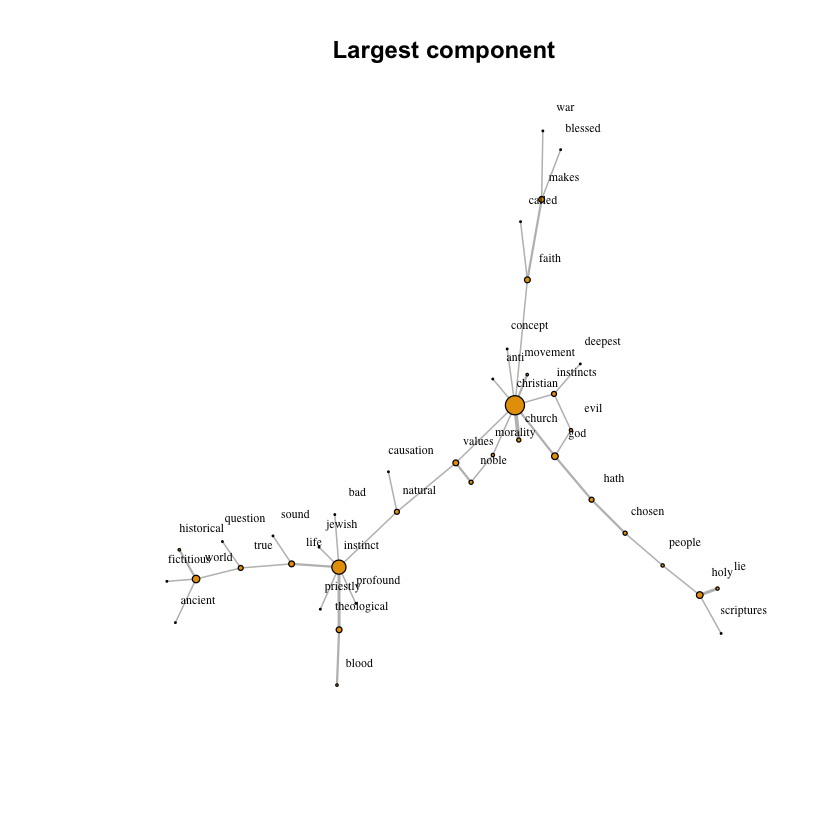

In [61]:
V(large_component)$degree <- strength(graph = large_component)

E(large_component)$width <- E(large_component)$weight/max(E(large_component)$weight)

plot(
  large_component, 
  vertex.size = .3*V(large_component)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = 1.6,
  edge.color = 'gray', 
  edge.width = 3*E(large_component)$width ,
  main = 'Largest component', 
  alpha = 10
    )

In [63]:
#Generate png file of plot above
png(filename = "bigram_component.png", height=3500, width=3500, res=400)
V(large_component)$degree <- strength(graph = large_component)

E(large_component)$width <- E(large_component)$weight/max(E(large_component)$weight)

plot(
  large_component, 
  vertex.size = .3*V(large_component)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = 1.6,
  edge.color = 'black', 
  edge.width = 3*E(large_component)$width ,
  alpha = 10
    )
dev.off()

pdf 
  2

Finally get the degree distribution of both the whole network and of the largest connected component. 
This gives us the relative frequency of $n$-th degree vertices, with $n = 1, 2, \dots, \max_{v} \lbrace \deg (v) \rbrace$

In [64]:
degree_distribution(network)

[1] 0.00000000 0.77372263 0.12408759 0.07299270 0.01459854 0.00000000
 [7] 0.00000000 0.00729927 0.00000000 0.00729927

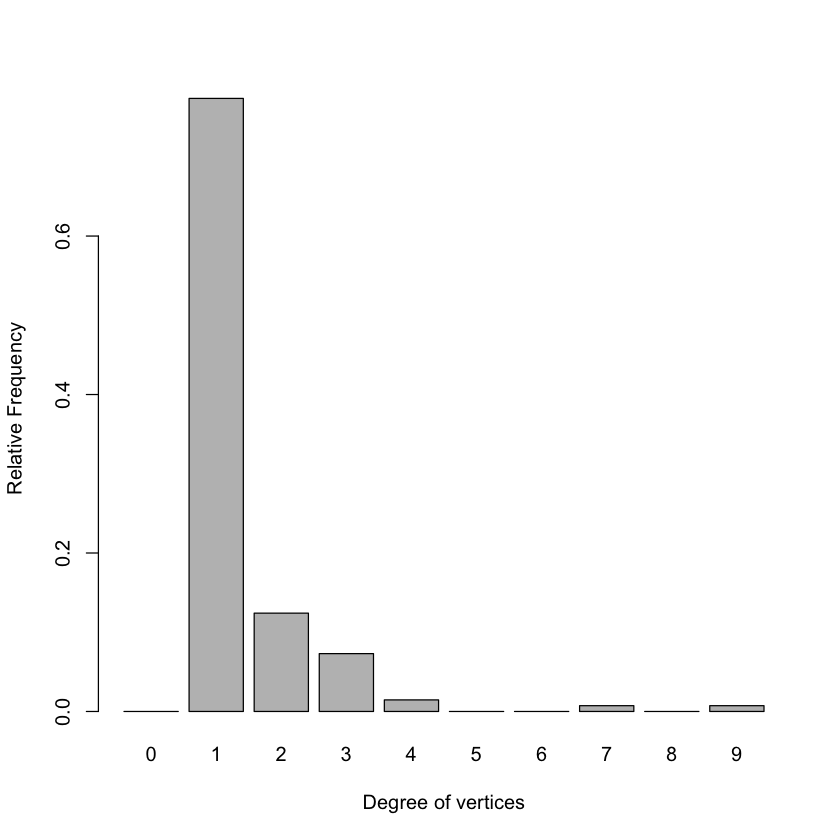

In [65]:
barplot(degree_distribution(network), 
        names=seq(0,9, by=1),
        xlab="Degree of vertices",
        ylab="Relative Frequency",
        width=1)
        

In [66]:
#Generate png of plot above
png(filename="network_degree_distribution.png", height=2000, width=2000, res=400)
barplot(degree_distribution(network), 
        names=seq(0,9, by=1),
        xlab="Degree of vertices",
        ylab="Relative Frequency",
        width=1)
dev.off()

pdf 
  2

In [67]:
degree_distribution(large_component)

[1] 0.000 0.525 0.175 0.225 0.025 0.000 0.000 0.025 0.000 0.025

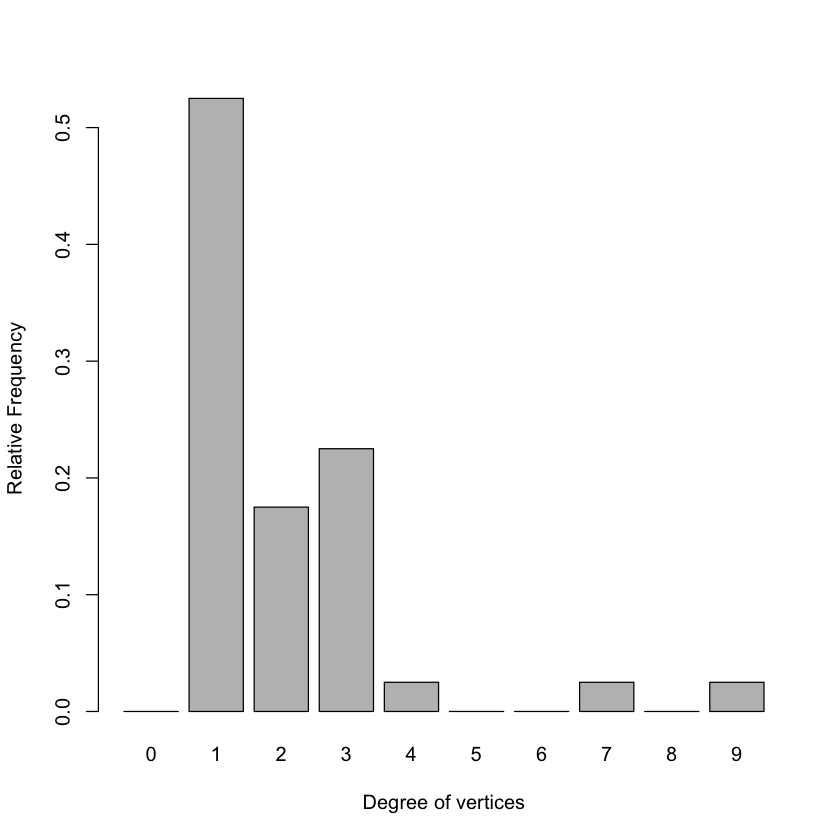

In [68]:
barplot(degree_distribution(large_component), 
        names=seq(0,9, by=1),
        xlab="Degree of vertices",
        ylab="Relative Frequency",
        width=1)

In [69]:
#Generate png file of plot above
png(filename="component_degree_distribution.png", height=2000, width=2000, res=400)
barplot(degree_distribution(large_component), 
        names=seq(0,9, by=1),
        xlab="Degree of vertices",
        ylab="Relative Frequency",
        width=1)
dev.off()

pdf 
  2

Finally we show the 10 vertices with the highest degree, and the 10 vertices with the highest strength. The first four coincide on both tables

In [70]:
vertex_degree_strength <- data.frame( "vertex" = as_ids(V(large_component)), 
           "degree" = degree(large_component, mode='all'),
          "strength" =  strength(large_component))

In [71]:
head(vertex_degree_strength[order(vertex_degree_strength$degree, decreasing=TRUE),],10)

,vertex,degree,strength
,<chr>,<dbl>,<dbl>
christian,christian,9,23
instinct,instinct,7,17
world,world,4,9
holy,holy,3,8
faith,faith,3,7
god,god,3,8
life,life,3,7
makes,makes,3,7
natural,natural,3,6


In [72]:
head(vertex_degree_strength[order(vertex_degree_strength$strength, decreasing=TRUE),],10)

,vertex,degree,strength
,<chr>,<dbl>,<dbl>
christian,christian,9,23
instinct,instinct,7,17
world,world,4,9
holy,holy,3,8
god,god,3,8
theological,theological,2,7
faith,faith,3,7
life,life,3,7
makes,makes,3,7


In [73]:
print(xtable(head(vertex_degree_strength[order(vertex_degree_strength$degree, decreasing=TRUE),],10)), include.rownames=FALSE)

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 14 19:38:36 2020
\begin{table}[ht]
\centering
\begin{tabular}{lrr}
  \hline
vertex & degree & strength \\ 
  \hline
christian & 9.00 & 23.00 \\ 
  instinct & 7.00 & 17.00 \\ 
  world & 4.00 & 9.00 \\ 
  holy & 3.00 & 8.00 \\ 
  faith & 3.00 & 7.00 \\ 
  god & 3.00 & 8.00 \\ 
  life & 3.00 & 7.00 \\ 
  makes & 3.00 & 7.00 \\ 
  natural & 3.00 & 6.00 \\ 
  true & 3.00 & 6.00 \\ 
   \hline
\end{tabular}
\end{table}


In [74]:
print(xtable(head(vertex_degree_strength[order(vertex_degree_strength$strength, decreasing=TRUE),],10)), include.rownames=FALSE)

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Mon Sep 14 19:38:36 2020
\begin{table}[ht]
\centering
\begin{tabular}{lrr}
  \hline
vertex & degree & strength \\ 
  \hline
christian & 9.00 & 23.00 \\ 
  instinct & 7.00 & 17.00 \\ 
  world & 4.00 & 9.00 \\ 
  holy & 3.00 & 8.00 \\ 
  god & 3.00 & 8.00 \\ 
  theological & 2.00 & 7.00 \\ 
  faith & 3.00 & 7.00 \\ 
  life & 3.00 & 7.00 \\ 
  makes & 3.00 & 7.00 \\ 
  values & 3.00 & 7.00 \\ 
   \hline
\end{tabular}
\end{table}
